### Importowanie bibliotek

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import pickle

from keras import Input
from keras.src.layers import Dropout
from keras.src.optimizers import Adam
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.python.keras.regularizers import l2

### Załadowanie zmiennych

In [266]:
with open('data_dump/dataAnalysisVars.pkl', 'rb') as f:
    df = pickle.load(f)
    
    df_0 = pickle.load(f)
    df_mean = pickle.load(f)
    df_interpolate = pickle.load(f)
    
    normalized_0 = pickle.load(f)
    scaler_0 = pickle.load(f)
    
    normalized_mean = pickle.load(f)
    scaler_mean = pickle.load(f)
    
    normalized_interpolate = pickle.load(f)
    scaler_interpolate = pickle.load(f)

### Funkcje do podziału zbioru danych

In [267]:
def split_df_train_test(data, test_size, seed):
    np.random.seed(seed)
    
    test_size = int(test_size * len(data))
    test_indices = np.random.choice(data.index, size=test_size, replace=False)
    train_indices = np.setdiff1d(data.index, test_indices)
    
    train_set = data.loc[train_indices]
    test_set = data.loc[test_indices]
    
    return train_set, test_set

def split_df_train_val_test(data, val_size, test_size, seed):
    np.random.seed(seed)
    
    val_size = int(val_size * len(data))
    test_size = int(test_size * len(data))
    
    val_test_indices = np.random.choice(data.index, size=val_size + test_size, replace=False)
    
    val_indices = val_test_indices[:val_size]
    test_indices = val_test_indices[val_size:]
    
    train_indices = np.setdiff1d(data.index, val_test_indices)
    
    train_set = data.loc[train_indices]
    val_set = data.loc[val_indices]
    test_set = data.loc[test_indices]
    
    return train_set, val_set, test_set

### MLP - Keras

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4916 - loss: 0.7374 - val_accuracy: 0.4985 - val_loss: 0.7097
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5188 - loss: 0.7009 - val_accuracy: 0.5260 - val_loss: 0.6959
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5649 - loss: 0.6879 - val_accuracy: 0.5902 - val_loss: 0.6876
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.5659 - loss: 0.6910 - val_accuracy: 0.5963 - val_loss: 0.6812
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5691 - loss: 0.6850 - val_accuracy: 0.6177 - val_loss: 0.6761
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5851 - loss: 0.6804 - val_accuracy: 0.6208 - val_loss: 0.6730
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.5969 - loss: 0.6704 - val_accuracy: 0.6239 - val_loss: 0.6698
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5699 - loss: 0.6763 - val_accuracy

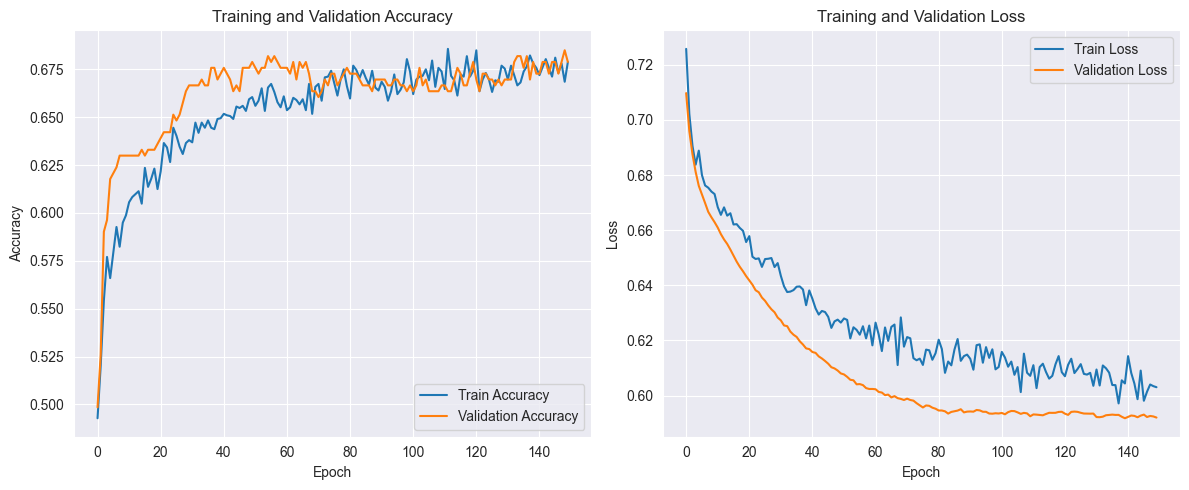

In [268]:
class MultiLayerPerceptron:

    def __init__(self, train_set, val_set, test_set):
        self.train_set = train_set.iloc[:, :-1]
        self.val_set = val_set.iloc[:, :-1]
        self.test_set = test_set.iloc[:, :-1]
        self.train_label = train_set.iloc[:, -1]
        self.val_label = val_set.iloc[:, -1]
        self.test_label = test_set.iloc[:, -1]
        self.history = None
        self._create_model()

    def _create_model(self):
        self.model = Sequential()
        
        self.model.add(Input(shape=(9,)))
        self.model.add(Dense(30, activation='leaky_relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(20, activation='leaky_relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(1, activation='sigmoid'))

        self.model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

    def train_model(self):
         self.history = self.model.fit(self.train_set, self.train_label, epochs=150, batch_size=64, validation_data=(self.val_set, self.val_label))

    def evaluate_model(self):
        test_loss, test_acc = self.model.evaluate(self.test_set, self.test_label)
        print('Test accuracy:', test_acc)
        
    def plot_results(self):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Train Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
train, val, test = split_df_train_val_test(normalized_interpolate, 0.1, 0.1, 111)

modelMLP = MultiLayerPerceptron(train, val, test)
modelMLP.train_model()
modelMLP.evaluate_model()
modelMLP.plot_results()